# Logistic Regression
> "Similar with linear regression but we wanted to change the output into 0 to 1."
- toc: true
- branch: master
- badges: true
- comments: true
- categories: [machine-learning, supervised, classification]

## General Formula

$$
h_\theta(x) = g(\theta^Tx) = \frac{1}{1 + e^{-\theta^Tx}}
$$

where
$$
g(z) = \frac{1}{1+e^{-z}}
$$

note that linear regression equation is:
$$
z_\theta = \theta^Tx
$$


## Derivatives of Logistic Regression

$$\begin{eqnarray}
g'(z) &=& \frac{d}{dz} \frac{1}{1 + e^{-z}}\\
 &=& \frac{1}{(1+e^{-z})^2} (e^{-z}) \\
 &=& \frac{1}{(1+e^{-z})} \dot (1 - \frac{1}{(1+e^{-z})})\\
 &=& g(z)(1 - g(z))
\end{eqnarray}
$$

## Classification with Logistic Regression
First we can formualate the classification problem into

$$\begin{eqnarray}
P(y=1 | x;\theta) &=& h_{\theta}(x)\\
P(y=0 | x;\theta) &=& 1 - h_{\theta}(x)
\end{eqnarray}$$

or more generally,

$$
p(y | x;\theta) = h_\theta(x)^y \space (1-y_\theta(x))^{(1-y)}
$$

$p(y | x;\theta)$ in human language:
> Given feature $x$ and some model parameter $\theta$, the probability of the data could be classified as $y$

$p(y | x;\theta)$ will also be called Likelihood $L(\theta)$.

$$\begin{eqnarray}
L(\theta) &=& p(\vec{y} | X;\theta)\\
&=&\prod_i^n p(y^{(i)} | x^{(i)};\theta)
\end{eqnarray}$$


and it will be easier to maximize the log likelihood:

$$\begin{eqnarray}
\ell(\theta) &=& log \space L(\theta)\\
&=&\sum_{i=1}^{n}y^{(i)} log  \\
&=&\sum_{i=1}^{n}y^{(i)} \text{log} h(x^{(i)}) + (1-y^{(i)}) \text{log}(1-h(x^{(i)}))
\end{eqnarray}$$


what about $\theta$ update rule? suprisingly we still ends up in similar update equation

$$
\theta_j := \theta_j + \alpha(y^{(\theta)} - h_{\theta}(x^{(i)}))x^{(i)}
$$

however it is not the same algorithm, because $h_\theta(x^{(i)})$
it's now called **perceptron learning algorithm**

In [4]:
import numpy as np

In [119]:
def h_x(theta, x):
    """
    the dot product between weight & x
    """
    y = np.zeros(x.shape[0])
    z = np.zeros(x.shape[0])
    for i in range(len(y)):
        z[i] = theta @ x[i]
    y = 1./(1 + np.power(np.e, -z))
    return y

def update_theta(theta, y, h_x, x, alpha=0.001):
    """
    produces new theta
    """
    return theta + alpha * ((y - h_x) @ x)


def learn(theta, x, y, max_iter=1000):
    """
    learn with gradient descent
    """
    i = 0
    stop = False
    h_x1 = h_x(theta, x)
    theta_new = np.copy(theta)
    
    while not stop or i < max_iter:
        theta_new = update_theta(theta, y, h_x1, x)
        if np.all(np.isclose(theta, theta_new)):
            stop = True
            
        theta = np.copy(theta_new)
        h_x1 = h_x(theta, x)
        i += 1
    return theta_new

def accuracy(y_true, y_predicted):
    """
    calculate the accuracy of classification
    """
    return np.sum(y_true == y_predicted)/np.float(y_true.shape[0])

In [120]:
import matplotlib.pyplot as plt

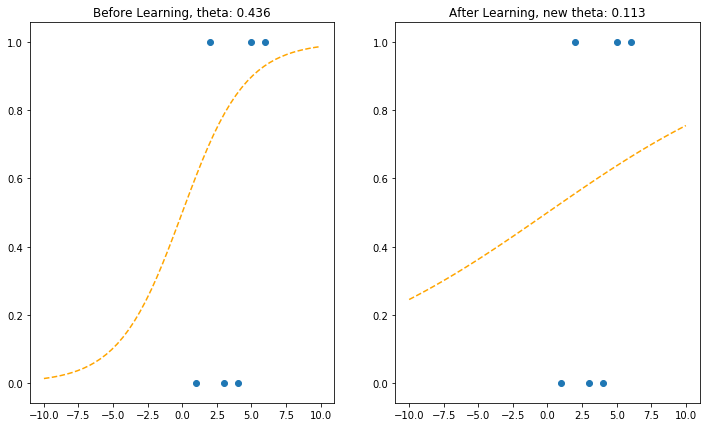

In [134]:
np.random.seed(2)
x = np.array([[1.], [2.], [3.], [4.], [5.], [6.]])
y = np.array([0, 1, 0, 0, 1,1])
theta = np.random.uniform(0, 1, 1)

h_x1 = h_x(theta, x)
theta_new = learn(theta, x, y)


f, ax = plt.subplots(figsize=(12, 7))
_x = np.linspace(-10, 10).reshape(-1, 1)
plt.subplot(121)
plt.title('Before Learning, theta: {:.3f}'.format(theta[0]))
plt.scatter(x[:, 0], y)
plt.plot(_x, h_x(theta, _x), c='orange', linestyle='--')

plt.subplot(122)
plt.title('After Learning, new theta: {:.3f}'.format(theta_new[0]))
_x = np.linspace(-10, 10).reshape(-1, 1)
plt.scatter(x[:, 0], y)
plt.plot(_x, h_x(theta_new, _x), c='orange', linestyle='--')
